## Final Project Submission

Please fill out:
* Student name: Lyndsay Maggin
* Student pace: self paced / part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understand the Data

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Column Definitions

##### This dataset was created in 2016, therefore assume data is being used for 2016 housing sales

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront (0,1,nan)
* **view** - Has been viewed (0-4, nan)
* **condition** - How good the condition is ( Overall ) (1-5)
* **grade** - overall grade given to the housing unit, based on King County grading system (3-13)
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df.price.mean()

540296.5735055795

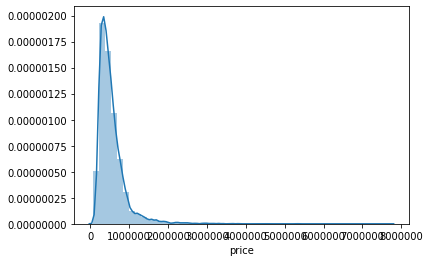

In [7]:
#distribution of prices
#not interested in the top 5%?
sns.distplot(df['price'])

In [8]:
#not interested in bedoorms more than 6?
pd.value_counts(df.bedrooms)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
#not interested in bathrooms greater than 6?
pd.value_counts(df.bathrooms)

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [10]:
#rennovated recently or not?
pd.value_counts(df.yr_renovated)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
columns =list(df.columns)

In [12]:
for col in columns:
    print(col,':', df[col].nunique())

id : 21420
date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 304
yr_built : 116
yr_renovated : 70
zipcode : 70
lat : 5033
long : 751
sqft_living15 : 777
sqft_lot15 : 8682


In [13]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [14]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

# Synopsis

#### The King County dataset is a list of homes sold between May 2014 and May 2015 in King County, Washington State (inclusive of Seattle). It is 2016 and I am a realtor in the King County Washington area working with a new family to find their forever home. Using this dataset, with my newly learned data science tools, I can predict the price that a home of interest will sell at and therefore can assist the family in entering a proper bid. 

### Data Cleaning

In [15]:
#Out of 21597 homes, 63 do not have view information, 2376 do not have waterfront information and 3842 do not have renovation information.
#This makes up 0%, 11% and 18% of total homes respectively. For data munging purposes I will exclude these values.

df = df.dropna()

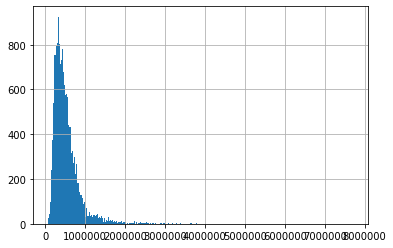

In [16]:
#the distribution of home prices is highly skewed with a long right tail
#for the purpose of this model I will remove the top 10% in order to mitigate skewed results
df['price'].hist(bins='auto')

In [17]:
df['price'].quantile([.05, .25, .5, .75, .9])

0.05    212000.0
0.25    321000.0
0.50    450000.0
0.75    644875.0
0.90    888900.0
Name: price, dtype: float64

In [18]:
top_ten = df['price'].quantile(.9)

In [19]:
df = df[df['price']<top_ten]

In [20]:
df.shape

(14185, 21)

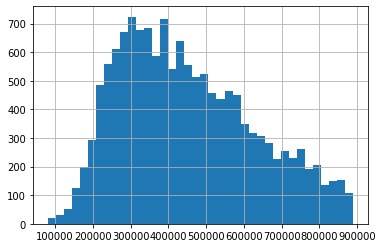

In [21]:
df['price'].hist(bins='auto')

In [22]:
#according to zipdatamaps.com, the most expensive zipcode in King County is 98039 (Medina)
#Latitude =47.627 Longitude = -122.233
#create a column in df for the distance of each home from Medina rather than using zips and long and lats

from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

medina_lat = radians(abs(47.627))
medina_lon = radians(abs(-122.233))

def distance(lat, long):

    lat = radians(abs(lat))
    long = radians(abs(long))
    
    dlon = medina_lon - (long)
    dlat = medina_lat - (lat)

    a = sin(dlat / 2)**2 + cos(medina_lat) * cos(lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    miles = round(distance * 0.621371, 3)
    
    return miles


In [23]:
df['medina_dist'] =  df.apply(lambda row : distance(row['lat'], row['long']), axis = 1)

In [24]:
df['yr_renovated']

1        1991.0
3           0.0
4           0.0
6           0.0
8           0.0
          ...  
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: yr_renovated, Length: 14185, dtype: float64

In [25]:
#create a categorical variable for yr_renovated
#only recently renovated homes will see a premium <5 years

df['recent_reno'] = df['yr_renovated']>2010.0
df['recent_reno'] = df['recent_reno'].astype(int)

In [26]:
pd.value_counts(df.recent_reno)

0    14081
1      104
Name: recent_reno, dtype: int64

In [27]:
#similarly new construction homes warrant a premium
df['new_con'] = df['yr_built']>2010.0
df['new_con'] = df['new_con'].astype(int)

In [28]:
pd.value_counts(df.new_con)

0    13533
1      652
Name: new_con, dtype: int64

In [29]:
#pd.value_counts(df['sqft_basement'])
#given the number of homes without basements I will make this a categorical variable
df['basement'] = df['sqft_basement']!=0
df['basement'] = df['basement'].astype(int)
pd.value_counts(df['basement'])

0    9001
1    5184
Name: basement, dtype: int64

In [30]:
df['baths'] = round(df['bathrooms'], 0)
df.drop(columns = ['bathrooms'], inplace = True)

In [31]:
df = df[df['bedrooms']!= 33]

In [32]:
columns = list(df.columns)

In [33]:
categorical = ['bedrooms', 'baths', 'floors', 'view', 'condition', 'grade', 'waterfront', 'recent_reno', 'new_con', 'basement']

In [34]:
continuous = columns
for cat in categorical:
    countinuous = continuous.remove(cat)

In [35]:
continuous.remove('price')
continuous.remove('id')
continuous.remove('date')
continuous.remove('zipcode')
continuous.remove('lat')
continuous.remove('long')
continuous.remove('yr_built')
continuous.remove('yr_renovated')
continuous.remove('sqft_basement')

In [36]:
continuous

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'medina_dist']

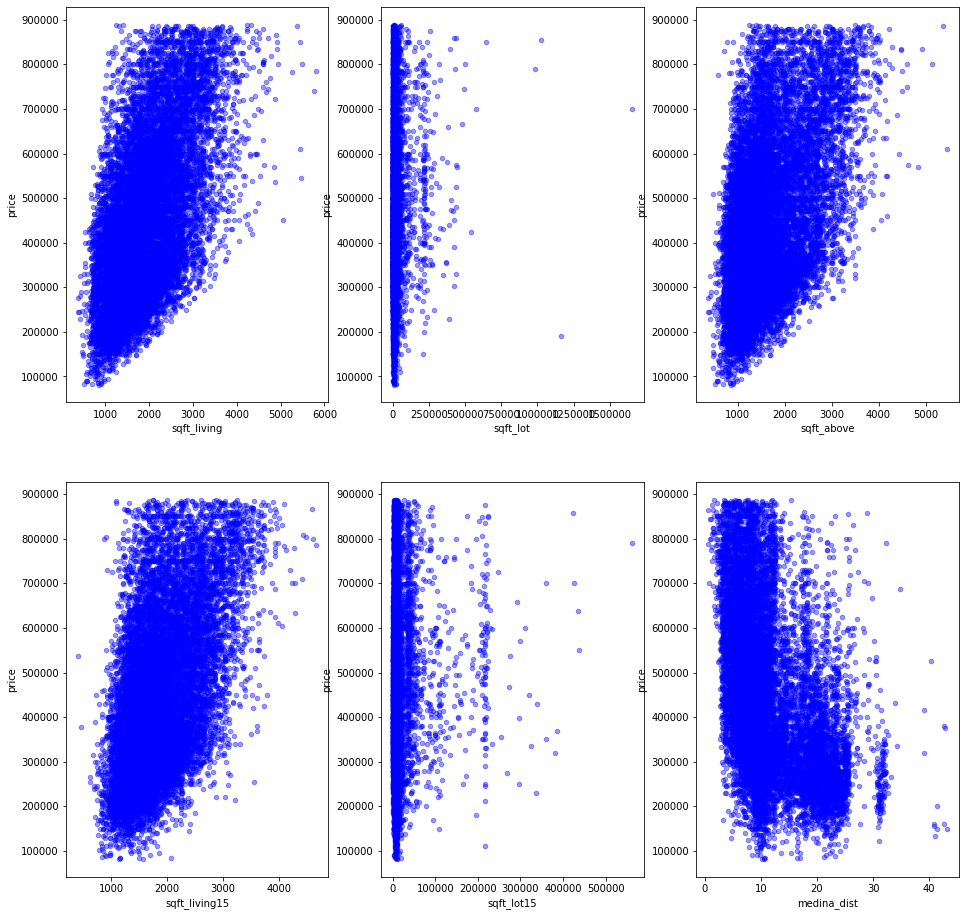

In [37]:
fig,axes = plt.subplots(2,3, figsize=(16,16))


for xcol, ax in zip(continuous, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### The sqft_lot variables do not seem to have a linear relationship with price and I can assume they are highly correlated with sqft_living

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DAEB712160>,
      dtype=object)

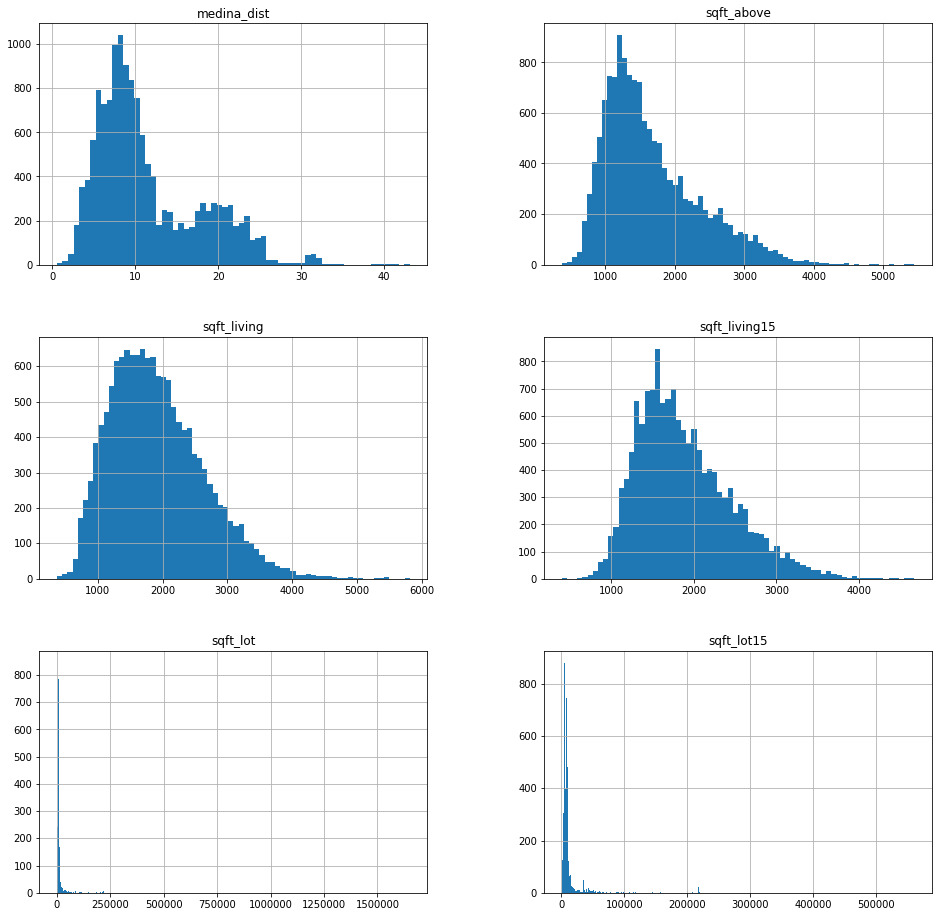

In [38]:
cont = df[continuous]
cont.hist(figsize = [16,16], bins='auto')

#### Sqft_lots have very long tails, might be good to remove the tails unless they are highly correlated with another function

In [39]:
categorical

['bedrooms',
 'baths',
 'floors',
 'view',
 'condition',
 'grade',
 'waterfront',
 'recent_reno',
 'new_con',
 'basement']

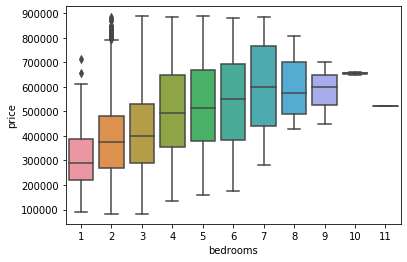

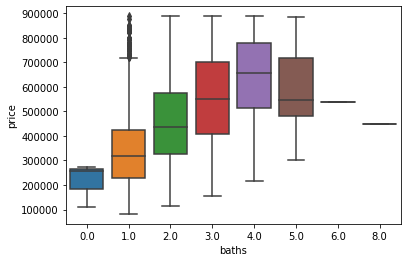

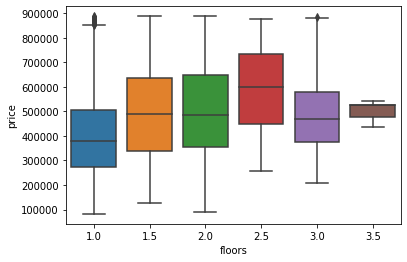

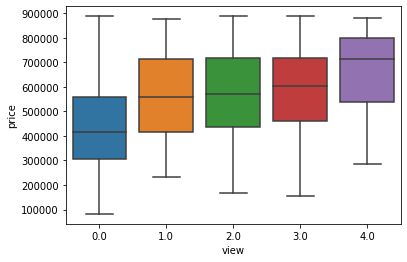

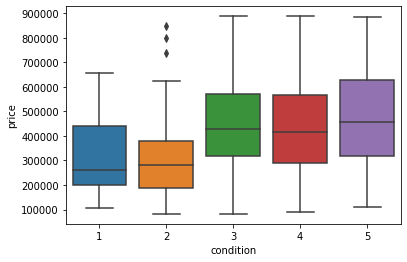

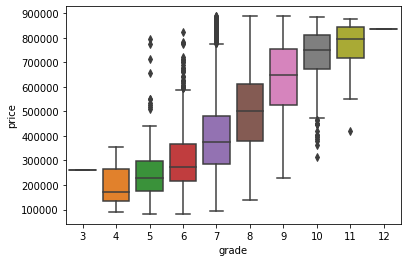

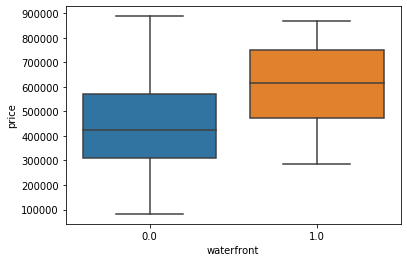

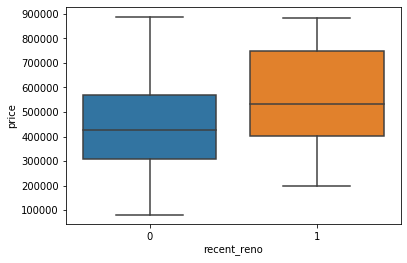

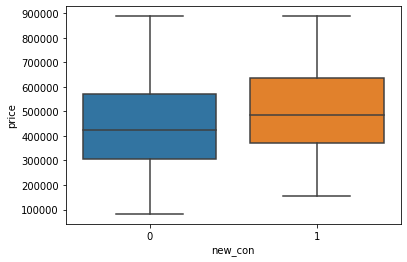

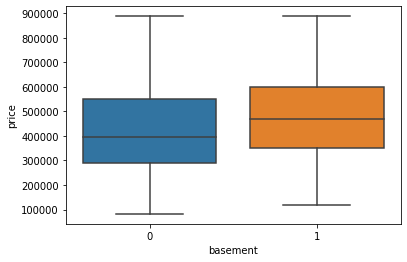

In [40]:
fig = plt.figure()
ax = plt.subplot(111)

for cat in categorical:
    sns.boxplot(cat, 'price', data=df)
    plt.show()

In [41]:
df.corr()

,id,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,medina_dist,recent_reno,new_con,basement,baths
id,1.000000,0.026944,0.020689,0.022669,-0.136163,0.035349,-0.001435,0.021721,-0.028552,0.043738,...,-0.005271,0.002022,0.020216,0.023045,-0.147441,-0.008336,0.001702,0.007181,0.002516,0.025195
price,0.026944,1.000000,0.274847,0.568361,0.086759,0.262231,0.039380,0.189772,0.028214,0.583100,...,-0.006506,0.457704,0.088746,0.513427,0.076989,-0.446626,0.046620,0.075249,0.147644,0.373753
bedrooms,0.020689,0.274847,1.000000,0.611010,0.018286,0.158352,-0.038411,0.020910,0.014365,0.312487,...,-0.149058,-0.046543,0.147063,0.375150,0.016007,0.042643,0.017249,0.076549,0.144466,0.465642
sqft_living,0.022669,0.568361,0.611010,1.000000,0.144006,0.329938,-0.011966,0.131066,-0.076809,0.670672,...,-0.210021,-0.020535,0.295433,0.718636,0.157337,0.086138,0.007528,0.122626,0.174439,0.611199
sqft_lot,-0.136163,0.086759,0.018286,0.144006,1.000000,-0.028038,0.014638,0.104490,-0.008589,0.074583,...,-0.132129,-0.099885,0.226199,0.146578,0.704752,0.212634,-0.014095,-0.050351,-0.032886,0.055838
floors,0.035349,0.262231,0.158352,0.329938,-0.028038,1.000000,-0.019091,-0.024375,-0.276985,0.452310,...,-0.068044,0.033342,0.141322,0.260502,-0.034238,0.004630,-0.024861,0.249144,-0.285321,0.347697
waterfront,-0.001435,0.039380,-0.038411,-0.011966,0.014638,-0.019091,1.000000,0.298300,0.014981,-0.020545,...,0.042165,-0.042110,-0.059615,0.002419,0.028622,0.034107,-0.004275,-0.010917,0.018327,-0.018850
view,0.021721,0.189772,0.020910,0.131066,0.104490,-0.024375,0.298300,1.000000,0.026824,0.098594,...,0.101047,-0.040471,-0.072922,0.154084,0.094613,0.026337,0.008666,-0.032705,0.114163,0.072321
condition,-0.028552,0.028214,0.014365,-0.076809,-0.008589,-0.276985,0.014981,0.026824,1.000000,-0.180158,...,-0.008729,-0.027050,-0.094288,-0.133326,0.004486,-0.033626,-0.046250,-0.137725,0.112368,-0.069337
grade,0.043738,0.583100,0.312487,0.670672,0.074583,0.452310,-0.020545,0.098594,-0.180158,1.000000,...,-0.189182,0.059985,0.234947,0.644602,0.085777,-0.005203,-0.007215,0.175572,-0.002857,0.484983


In [42]:
df_c = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_c['pairs'] = list(zip(df_c.level_0, df_c.level_1))
df_c.set_index(['pairs'], inplace = True)
df_c.drop(columns = ['level_0', 'level_1'], inplace = True)
df_c.columns =['cc']
df_c.drop_duplicates(inplace = True)

In [43]:
df_c.head(10)

,cc
pairs,
"(id, id)",1.000000
"(sqft_living, sqft_above)",0.841201
"(basement, sqft_basement)",0.839598
"(medina_dist, lat)",0.771581
"(sqft_living15, sqft_living)",0.718636
"(sqft_lot, sqft_lot15)",0.704752
"(sqft_living15, sqft_above)",0.697883
"(grade, sqft_above)",0.678728
"(grade, sqft_living)",0.670672


#### As mentioned previously you can see that sqft_above and living are highly correlated however sqft_lot and living are not highly correlated.

### Standardizing

In [44]:
continuous

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15',
 'medina_dist']

In [45]:
#based on the charts above, I have chosen the below variables
cont_var = ['sqft_living',
 'sqft_lot',
 'medina_dist']

##### Logging each continuous variable with the exception of geographic variables and number of beds/baths

In [46]:
df_logged = pd.DataFrame([])

df_logged['lg_sqft_living'] = np.log(df['sqft_living'])
df_logged['lg_sqft_lot'] = np.log(df['sqft_lot'])
df_logged['lg_medina_dist'] = np.log(df['medina_dist'])

In [47]:
logged_continuous_variables = ['lg_sqft_living', 'lg_sqft_lot','lg_medina_dist']

In [48]:
df_logged['price'] = df['price']

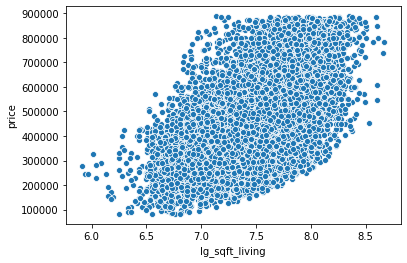

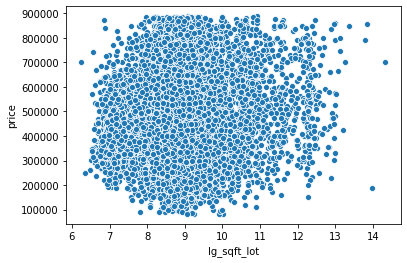

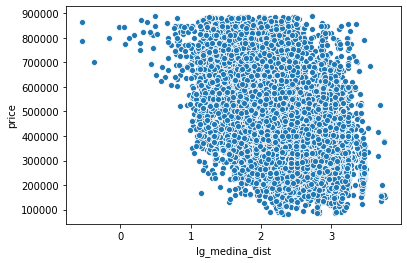

In [49]:
for var in logged_continuous_variables:
    sns.scatterplot(var, 'price', data=df_logged)
    plt.show()

#### There does not seem to be a linear relationship between price and logged_sqft_lot

##### Scaling the logged continuous variables

In [50]:
df_scaled = pd.DataFrame([])

df_scaled['sc_sqft_living'] = (df_logged['lg_sqft_living'] - np.mean(df_logged['lg_sqft_living']))/np.sqrt(np.var(df_logged['lg_sqft_living']))
df_scaled['sc_sqft_lot'] = (df_logged['lg_sqft_lot'] - np.mean(df_logged['lg_sqft_lot']))/np.sqrt(np.var(df_logged['lg_sqft_lot']))
df_scaled['sc_medina_dist'] = (df_logged['lg_medina_dist'] - np.mean(df_logged['lg_medina_dist']))/np.sqrt(np.var(df_logged['lg_medina_dist']))

In [51]:
df_scaled['price'] = df['price']

In [52]:
scaled_continuous_variables = ['sc_sqft_living', 'sc_sqft_lot','sc_medina_dist']

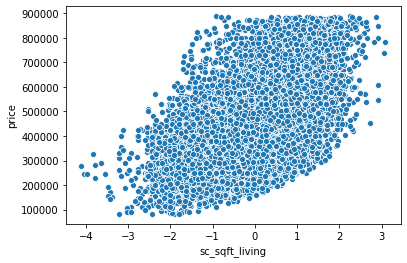

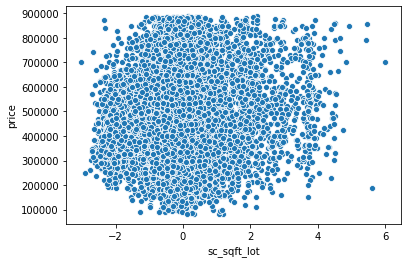

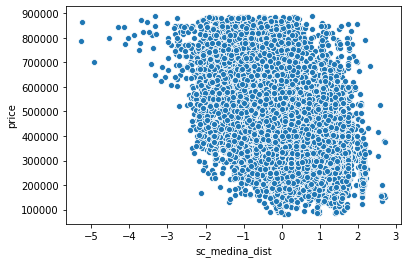

In [53]:
for var in scaled_continuous_variables:
    sns.scatterplot(var, 'price', data=df_scaled)
    plt.show()

In [54]:
df_std = df_scaled

In [55]:
df_std

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,price
1,0.949372,-0.071512,-0.482962,538000.0
3,0.242324,-0.485664,0.101499,604000.0
4,-0.159917,0.050896,-0.222212,510000.0
6,-0.106113,-0.138795,1.506461,257500.0
8,-0.009042,-0.036859,-0.118420,229500.0
...,...,...,...,...
21591,-0.809049,-1.996783,-0.200025,475000.0
21592,-0.403964,-2.147298,-0.576443,360000.0
21593,0.671057,-0.317236,0.024620,400000.0
21594,-1.461985,-1.949420,-1.767031,402101.0


##### Create dummy variables for categories

In [56]:
dummies = [ 'baths',
 'floors',
 'view',
 'condition',
 'grade',
 'bedrooms']

In [57]:
for dum in dummies:
    x = pd.get_dummies(df[dum], prefix = dum[:4], drop_first = True)
    df_std = pd.concat([df_std, x], axis=1)

In [58]:
price = df_std['price']

In [59]:
df_std.head(1)

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,price,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,...,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,bedr_9,bedr_10,bedr_11
1,0.949372,-0.071512,-0.482962,538000.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
data = df_std.drop('price', axis=1)

In [61]:
data.head(1)

,sc_sqft_living,sc_sqft_lot,sc_medina_dist,bath_1.0,bath_2.0,bath_3.0,bath_4.0,bath_5.0,bath_6.0,bath_8.0,...,bedr_2,bedr_3,bedr_4,bedr_5,bedr_6,bedr_7,bedr_8,bedr_9,bedr_10,bedr_11
1,0.949372,-0.071512,-0.482962,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Choosing Variables

In [62]:
Y = price
X = data
k = len(list(data.columns))

In [63]:
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

In [64]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [65]:
for col in list(data.columns):
    data[col] = data[col].fillna(0)

In [66]:
for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [67]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [68]:
m = len(Y)
p = k
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[sc_sqft_living],3.085663e+14,0.309330,1,2.175588e+10,2.278484,2.279016,0.309282
2,"[sc_sqft_living, sc_medina_dist]",1.842384e+14,0.587616,2,1.299186e+10,1.360632,1.361698,0.587558
3,"[sc_sqft_living, sc_medina_dist, grad_9]",1.742420e+14,0.609991,3,1.228844e+10,1.286963,1.288562,0.609908
4,"[sc_sqft_living, sc_medina_dist, grad_9, grad_10]",1.639421e+14,0.633045,4,1.156363e+10,1.211054,1.213185,0.632942
5,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.561628e+14,0.650458,5,1.101652e+10,1.153755,1.156420,0.650335
6,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.516211e+14,0.660624,6,1.069767e+10,1.120362,1.123560,0.660480
7,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.494452e+14,0.665494,7,1.054560e+10,1.104436,1.108167,0.665329
8,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.477287e+14,0.669336,8,1.042594e+10,1.091904,1.096168,0.669150
9,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.460750e+14,0.673038,9,1.031069e+10,1.079834,1.084631,0.672830
10,"[sc_sqft_living, sc_medina_dist, grad_9, grad_...",1.443824e+14,0.676826,10,1.019271e+10,1.067478,1.072808,0.676598


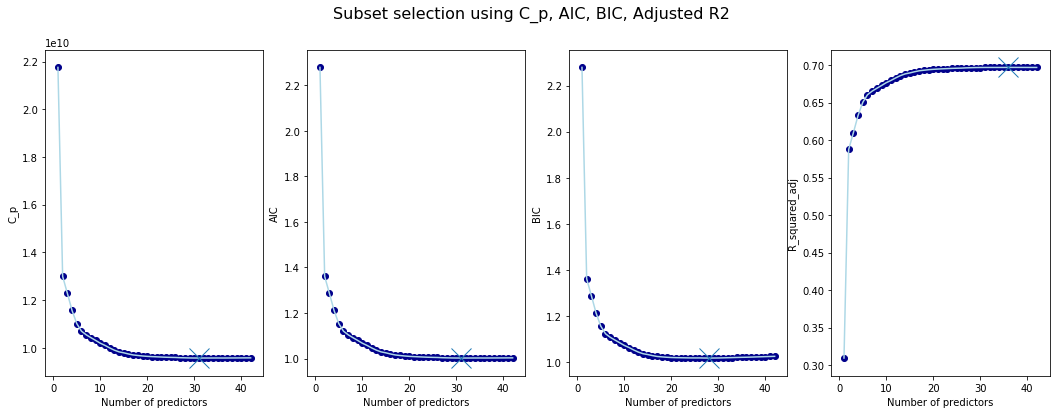

In [69]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

### The lowest Mallow's Cp is at 39 variables whereas the highest Rsquared is at 39, the lowest AIC is also at 39. However there is a miniscule difference between 30 variables and 39 and 30 is much more explainable. I will therefore use 30 of the 42

In [70]:
variables = df1['features'][30]

In [71]:
df_30= data[variables]

In [72]:
variables

['sc_sqft_living',
 'sc_medina_dist',
 'grad_9',
 'grad_10',
 'grad_8',
 'sc_sqft_lot',
 'view_4.0',
 'view_2.0',
 'cond_5',
 'grad_11',
 'floo_1.5',
 'grad_7',
 'bedr_2',
 'view_3.0',
 'cond_4',
 'floo_2.0',
 'view_1.0',
 'bath_4.0',
 'bedr_5',
 'cond_3',
 'floo_3.0',
 'grad_12',
 'bath_3.0',
 'bedr_6',
 'floo_2.5',
 'bedr_4',
 'bedr_3',
 'bedr_7',
 'bath_8.0',
 'bedr_8']

In [73]:
df_30.columns = ['sc_sqft_living',
 'sc_medina_dist',
 'grad_9',
 'grad_10',
 'grad_8',
 'sc_sqft_lot',
 'view_4',
 'view_2',
 'cond_5',
 'grad_11',
 'floo_1_5',
 'grad_7',
 'bedr_2',
 'view_3',
 'cond_4',
 'floo_2',
 'view_1',
 'bath_4',
 'bedr_5',
 'cond_3',
 'floo_3',
 'grad_12',
 'bath_3',
 'bedr_6',
 'floo_2_5',
 'bedr_4',
 'bedr_3',
 'bedr_7',
 'bath_8',
 'bedr_8']

In [74]:
df_30

,sc_sqft_living,sc_medina_dist,grad_9,grad_10,grad_8,sc_sqft_lot,view_4,view_2,cond_5,grad_11,...,floo_3,grad_12,bath_3,bedr_6,floo_2_5,bedr_4,bedr_3,bedr_7,bath_8,bedr_8
1,0.949372,-0.482962,0,0,0,-0.071512,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.242324,0.101499,0,0,0,-0.485664,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,-0.159917,-0.222212,0,0,1,0.050896,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,-0.106113,1.506461,0,0,0,-0.138795,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,-0.009042,-0.118420,0,0,0,-0.036859,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,-0.809049,-0.200025,0,0,1,-1.996783,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21592,-0.403964,-0.576443,0,0,1,-2.147298,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
21593,0.671057,0.024620,0,0,1,-0.317236,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
21594,-1.461985,-1.767031,0,0,0,-1.949420,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14184 entries, 1 to 21596
Data columns (total 30 columns):
sc_sqft_living    14184 non-null float64
sc_medina_dist    14184 non-null float64
grad_9            14184 non-null uint8
grad_10           14184 non-null uint8
grad_8            14184 non-null uint8
sc_sqft_lot       14184 non-null float64
view_4            14184 non-null uint8
view_2            14184 non-null uint8
cond_5            14184 non-null uint8
grad_11           14184 non-null uint8
floo_1_5          14184 non-null uint8
grad_7            14184 non-null uint8
bedr_2            14184 non-null uint8
view_3            14184 non-null uint8
cond_4            14184 non-null uint8
floo_2            14184 non-null uint8
view_1            14184 non-null uint8
bath_4            14184 non-null uint8
bedr_5            14184 non-null uint8
cond_3            14184 non-null uint8
floo_3            14184 non-null uint8
grad_12           14184 non-null uint8
bath_3            14184 non

### Create train and test sets

In [76]:
Y = price
X = df_30
k = len(variables)

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)

In [78]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [79]:
train_residuals = y_hat_train - Y_train
test_residuals = y_hat_test - Y_test

In [80]:
mse_train = np.sum((Y_train - y_hat_train)**2)/len(Y_train)
mse_test = np.sum((Y_test - y_hat_test)**2)/len(Y_test)
print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test)

Train MSE:  9488925675.837404
Test MSE:  9736833146.677868


In [81]:
linreg.coef_

array([  64564.0543279 ,  -96886.21660365,  178414.49027886,
        238861.13785291,  100734.0022718 ,   24588.4117663 ,
        174082.8495145 ,   57343.73045479,   98376.10083553,
        262408.02955561,   44330.08349766,   39694.90750436,
        -10614.29542597,   71810.66379952,   68353.84816823,
         22843.68399633,   60442.10502135,   40039.09909113,
        -69866.73323795,   49526.70115947,   27033.19295638,
        370894.07900863,   13477.89672055,  -76007.94724441,
         57696.9305161 ,  -46453.09824767,  -41772.37365065,
       -108837.40956489, -299886.78461092, -133971.50343208])

In [82]:
linreg.intercept_

340874.5008932332

#### K-Folds

In [83]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_result = cross_val_score(linreg, X, Y, cv = 10, scoring = mse)

In [84]:
mse = cv_result.mean()

In [85]:
cv_result_r = cross_val_score(linreg, X, Y, cv = 10, scoring = 'r2')
cv_result_r.mean()

0.692925793527027

In [86]:
sqrt_mse = sqrt(mse)

In [87]:
print(f'predicted home value error of ${round(sqrt_mse,2)}')

predicted home value error of $98081.04


In [88]:
# square root of mean squared error of 9757804158.897976 ~ 98782. Therefore pricing error is about $98,081

### Predicting a house price

In [89]:
outcome = 'price'
pred_sum = '+'.join(df_30.columns)
formula = outcome + '~' + pred_sum

In [90]:
model = ols(formula=formula, data=df_30).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        19:22:25   Log-Likelihood:            -1.8308e+05
No. Observations:               14184   AIC:                         3.662e+05
Df Residuals:                   14153   BIC:                         3.665e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.519e+05   1.17e+04     30.074      0.000    3.29e+05    3.75e+05
sc_sqft_living  6.619e+04   1501.648     44.080      0.000    6.32e+04    6.91e+04
sc_medina_dist  -9.59e+04    911.632   -105.192      0.000   -9.77e+04   -9.41e+04
grad_9          1.834e+05   4702.989     38.991      0.000    1.74e+05    1.93e+05
grad_10         2.435e+05   6662.690     36.553      0.000     2.3e+05    2.57e+05
grad_8           1.02e+05   3647.457     27.953      0.000    9.48e+04    1.09e+05
sc_sqft_lot     2.264e+04   1037.874     21.818      0.000    2.06e+04    2.47e+04
view_4           1.69e+05   1.13e+04     14.974      0.000    1.47e+05    1.91e+05
view_2          5.977e+04   4559.145     13.110      0.000    5.08e+04    6.87e+04
cond_5           9.28e+04   8713.303     10.651      0.000    7.57e+04     1.1e+05
grad_11         2.713e+05   1.84e+04     14.717      0.000    2.35e+05    3.07e+05
floo_1_5        4.647e+04   3055.322     15.208      0.000    4.05e+04    5.25e+04
grad_7          4.084e+04   3026.339     13.495      0.000    3.49e+04    4.68e+04
bedr_2         -1.327e+04   8494.375     -1.563      0.118   -2.99e+04    3377.063
view_3          7.264e+04   7141.946     10.171      0.000    5.86e+04    8.66e+04
cond_4          6.176e+04   8325.982      7.418      0.000    4.54e+04    7.81e+04
floo_2          2.161e+04   2303.691      9.381      0.000    1.71e+04    2.61e+04
view_1          5.951e+04   7474.434      7.962      0.000    4.49e+04    7.42e+04
bath_4          3.578e+04   5215.526      6.860      0.000    2.56e+04     4.6e+04
bedr_5         -7.515e+04   9457.696     -7.946      0.000   -9.37e+04   -5.66e+04
cond_3          4.283e+04   8278.078      5.174      0.000    2.66e+04    5.91e+04
floo_3          2.372e+04   5662.368      4.189      0.000    1.26e+04    3.48e+04
grad_12         3.759e+05    9.8e+04      3.836      0.000    1.84e+05    5.68e+05
bath_3          1.219e+04   2986.332      4.083      0.000    6340.683     1.8e+04
bedr_6         -8.502e+04   1.22e+04     -6.989      0.000   -1.09e+05   -6.12e+04
floo_2_5        3.925e+04   1.24e+04      3.156      0.002    1.49e+04    6.36e+04
bedr_4         -5.345e+04   8803.239     -6.072      0.000   -7.07e+04   -3.62e+04
bedr_3          -4.68e+04   8521.980     -5.491      0.000   -6.35e+04   -3.01e+04
bedr_7         -8.901e+04   2.61e+04     -3.405      0.001    -1.4e+05   -3.78e+04
bath_8         -3.063e+05   9.82e+04     -3.117      0.002   -4.99e+05   -1.14e+05
bedr_8         -1.063e+05   4.47e+04     -2.378      0.017   -1.94e+05   -1.87e+04
==============================================================================
Omnibus:                      291.552   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              344.766
Skew:                   

C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


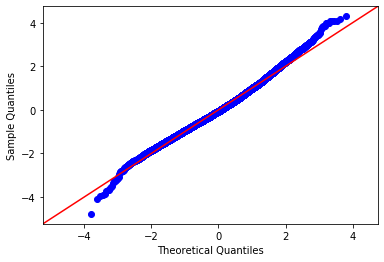

In [91]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [92]:
#using the quantile-quantile plot above you can see that there is some kurtosis in the residuals
#longer left tail with possible outliers
#otherwise normal residuals

In [93]:
model_fitted_y = model.fittedvalues

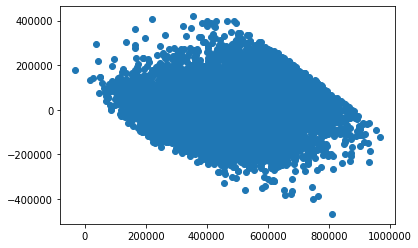

In [94]:
plt.scatter(model_fitted_y, residuals)
plt.show()

In [95]:
#there looks to be some sort of pattern between fitted and residual values which may
#point to heteroscadisity

C:\Users\ljmag\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\utils.py:89: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


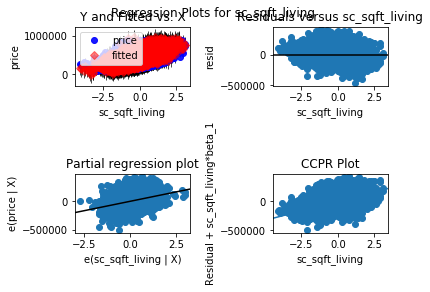

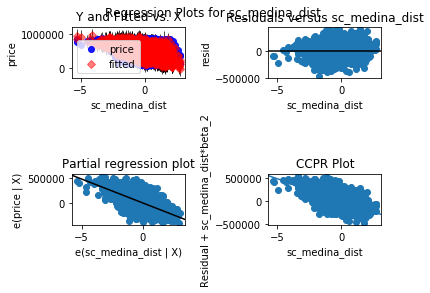

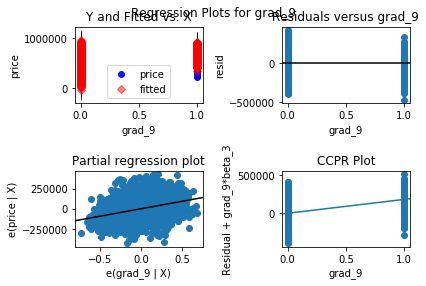

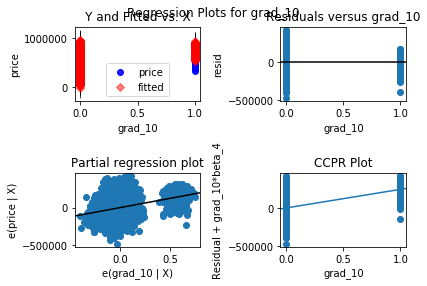

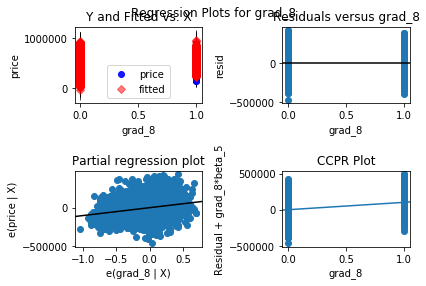

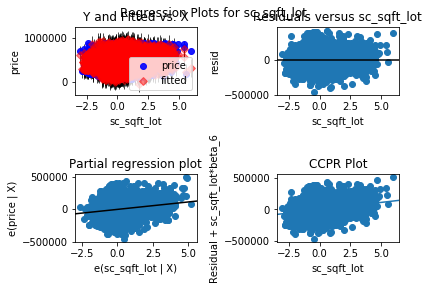

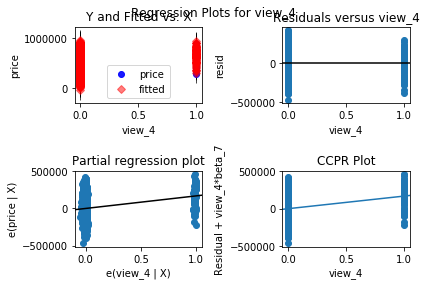

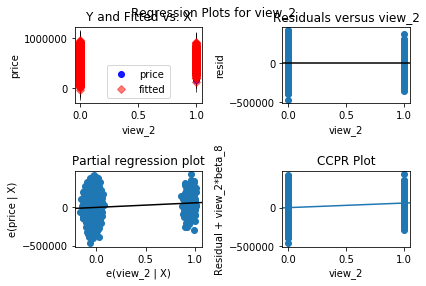

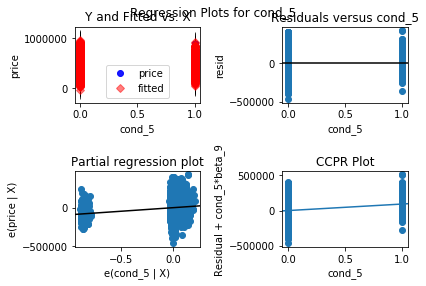

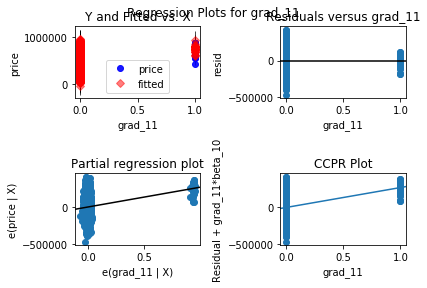

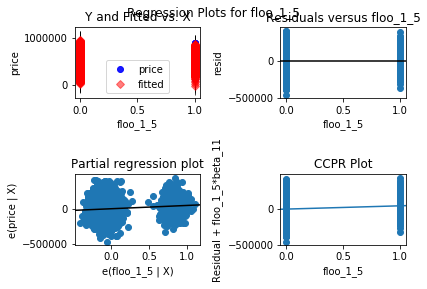

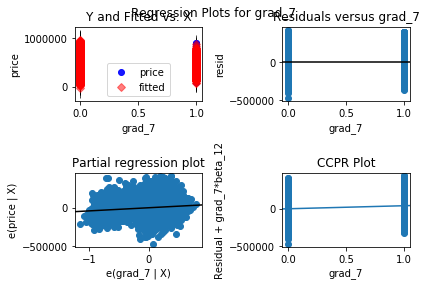

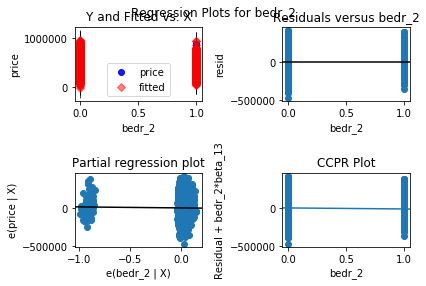

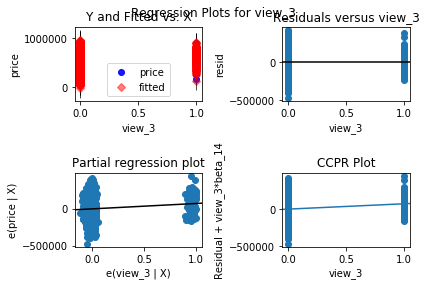

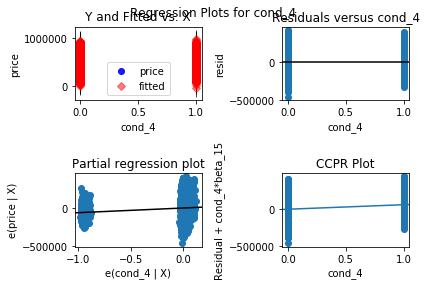

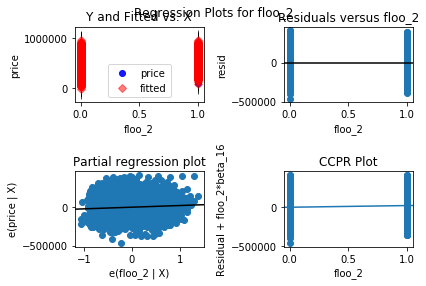

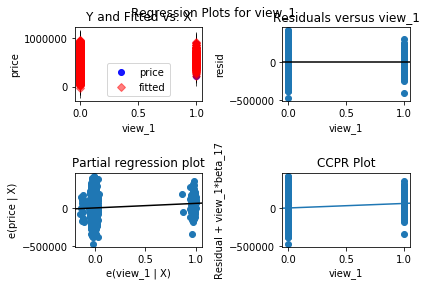

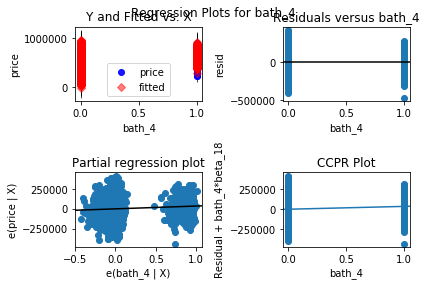

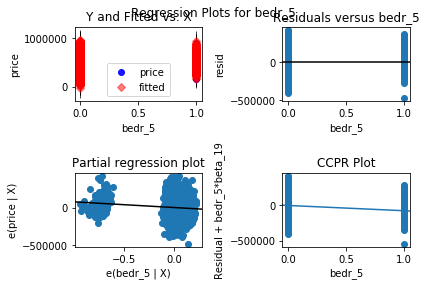

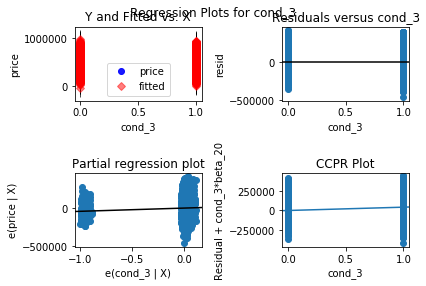

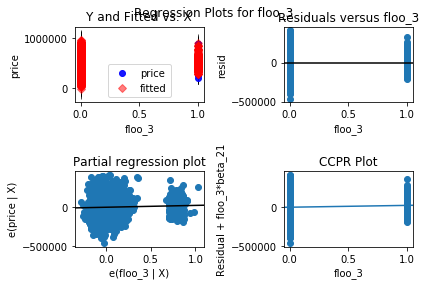

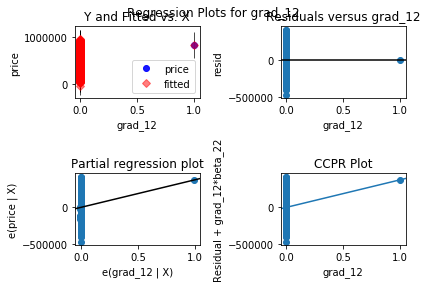

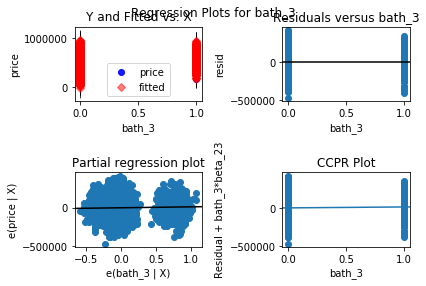

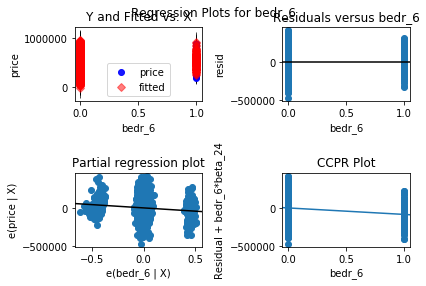

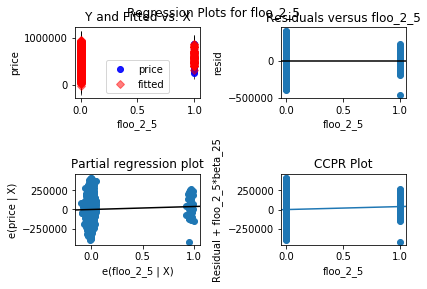

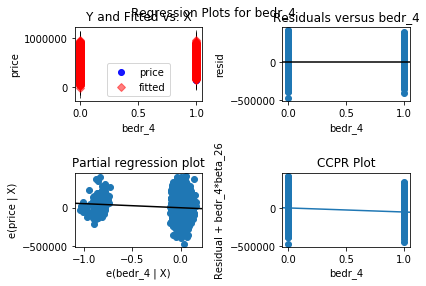

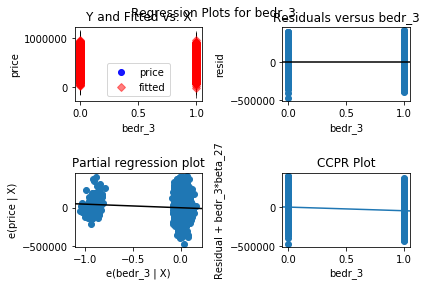

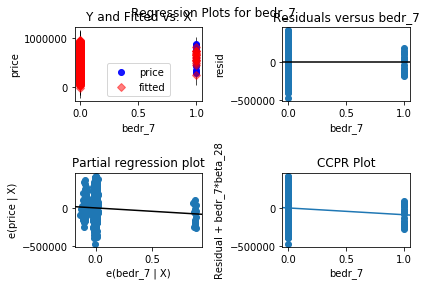

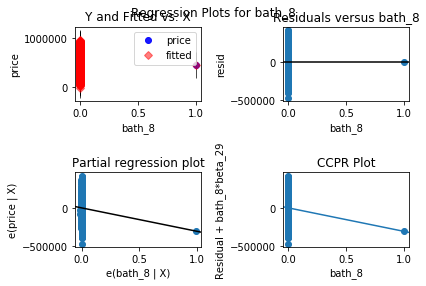

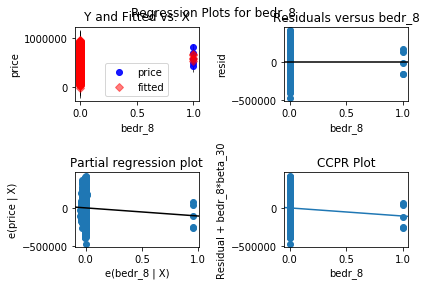

In [96]:
for i in df_30.columns:
    fig = sm.graphics.plot_regress_exog(model, i)
    fig.tight_layout(pad=1.0)

#### My client is currently looking at the following home close to Medina:
##### 3 bed, 4 bath, 3,481 sqft livable space, build in 2006, with a 16,988 sqft lot, gorgeous views of the water, and highly rated.
##### The home is pricing for $899,900 today, is this a competitive price for them?

In [99]:
distance(47.512550, -122.501780)

14.821

In [100]:
log_living = np.log(3481)
log_lot = np.log(16988)
log_dist = np.log(14.821)

In [101]:
sc_living = (log_living - np.mean(df_logged['lg_sqft_living']))/np.sqrt(np.var(df_logged['lg_sqft_living']))
sc_lot = (log_lot -  np.mean(df_logged['lg_sqft_lot']))/np.sqrt(np.var(df_logged['lg_sqft_lot']))
sc_dis = (log_dist -  np.mean(df_logged['lg_medina_dist']))/np.sqrt(np.var(df_logged['lg_medina_dist']))

In [102]:
sc_living

1.7410999445160933

In [103]:
sc_lot

0.8816547761639771

In [104]:
sc_dis

0.7451629738594537

In [105]:
values_updated = pd.read_csv('values_updated.csv')

In [112]:
values_updated['prod'] = values_updated['coef'] * values_updated['Scaled']
pred = sum(values_updated['prod']) + model.params[0]

In [113]:
print('The predicted home value for this single family property is: $',round(pred,2))

The predicted home value for this single family property is: $ 953974.2


##### Currently this home is selling for: 899,900. However, our model prices this home at 953,974. I would therefore convince this client to place a bid since this home seems to be undervalued